<a href="https://colab.research.google.com/github/kerryback/2022-BUSI520/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# to select best hyperparameters
from sklearn.model_selection import GridSearchCV

# preprocessing steps
from sklearn.preprocessing import (
    QuantileTransformer,
    StandardScaler,
    PolynomialFeatures,
)

# to combine preprocessing and fitting
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

# decision tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# forests
from sklearn.ensemble import (
    RandomForestClassifier, 
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    AdaBoostClassifier,
    AdaBoostRegressor
)

# neural network
from sklearn.neural_network import MLPClassifier, MLPRegressor



# useful tools for classification problems
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    precision_score,
    recall_score
)


### A very small data set

In [ ]:
data = pd.read_csv("https://www.dropbox.com/s/012c6y4gxsxss6y/ghz.csv?dl=1", parse_dates=["date"])
data.permno = data.permno.astype(int)
data['date'] = data.date.dt.to_period('M')
data = data.sort_values(by=['date', 'permno']).reset_index(drop=True)
data.ret *= 100

data = data[data.date>="2016-01"]

data['xret'] = data.groupby("date").ret.apply(lambda x: x-x.mean())
data['dummy'] = 1 * (data.xret>0)
data['category'] = data.groupby('date').ret.apply(lambda x: pd.qcut(x, 3, labels=range(1,4)))

### Train/test split

In [ ]:
train = data[data.date<"2020-01-01"]
test = data[data.date>="2020-01-01"]

Xtrain = train[['acc', 'agr']]
Xtest = test[['acc', 'agr']]

ytrain = train.xret
ytest = test.xret

### Decision tree regressor

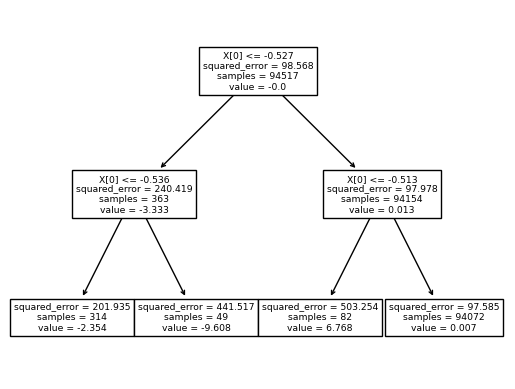

In [ ]:
model = DecisionTreeRegressor(max_depth=2)
model.fit(Xtrain, ytrain)
plt.figure()
plot_tree(model)
plt.show()

In [ ]:
print('Score on training set is', model.score(Xtrain, ytrain))
print('Score on test set is', model.score(Xtest, ytest))


MSE on training set is 0.0010760090608382678
MSE on test set is -7.441126309526425e-05


### Exercises

1. Write a loop to fit the decision tree with max_depth = (1, 2, ..., 10).  Plot the training and test scores as a function of max_depth.
2. Use GridSearchCV on the training set to find the best max_depth.

### Decision tree classifier (binary)

* precision = TP / (TP+FP) = fraction of positive predictions that were correct
* recall = TP / (TP+FN) = fraction of actual positives that you got right

In [ ]:
ytrain = train.dummy
ytest = test.dummy

model = DecisionTreeClassifier(max_depth=4)
model.fit(Xtrain, ytrain)
# model.predict_proba(Xtest)
# model.predict(Xtest)
# model.score(Xtest, ytest)
# precision_score(ytest, model.predict(Xtest))
# recall_score(ytest, model.predict(Xtest))
# ConfusionMatrixDisplay.from_estimator(estimator=model, X=Xtest, y=ytest)

0.022397176598343966

### Decision tree classifier (multiclass)

In [ ]:
ytrain = train.category
ytest = test.category

model = DecisionTreeClassifier(max_depth=4)
model.fit(Xtrain, ytrain)
# model.predict_proba(Xtest)
# model.predict(Xtest)
# model.score(Xtest, ytest)
# precision_score(ytest, model.predict(Xtest), average="micro")
# recall_score(ytest, model.predict(Xtest), average="micro")
# ConfusionMatrixDisplay.from_estimator(estimator=model, X=Xtest, y=ytest)

0.37247916666666664

### Transforming the target variable

Pass the model and the transformer to TransformedTargetRegressor.  Then fit, predict, score as usual.  The transformer is automatically inverted on the predictions to return them untransformed.

In [ ]:
regressor = DecisionTreeRegressor(max_depth=4)
transformer = QuantileTransformer(output_distribution="normal")
model = TransformedTargetRegressor(regressor=regressor, transformer=transformer)
model.fit(Xtrain, ytrain)
model.score(Xtest, ytest)

-0.014648925537231294

### Forests

Random forests are implemented like decision trees.  There are regressors and classifiers.  max_depth must be specified and also the number of trees (default=100).

Gradient boosting is implemented similarly.  In addition to max_depth and number of trees, the learning rate is an important parameter.

Adaptive boosting is also similar. But AdaBoostRegressor and AdaBoostClassifier can be applied to models other than trees.  So, the syntax is a little different.

### Forest regressors

In [ ]:
ytrain = train.xret
ytest = test.xret

model = RandomForestRegressor(n_estimators=50, max_depth=4)
# model = GradientBoostingRegressor(n_estimators=50, max_depth=4, learning_rate=0.5)

# estimator = DecisionTreeRegressor(max_depth=4)
# model = AdaBoostRegressor(base_estimator=estimator, n_estimators=50, learning_rate=0.5)

model.fit(Xtrain, ytrain)
model.score(Xtest, ytest)

-0.014369354619952812

### Forest classifiers

In [ ]:
ytrain = train.category
ytest = test.category

model = RandomForestClassifier(n_estimators=50, max_depth=4)
# model = GradientBoostingClassifier(n_estimators=50, max_depth=4, learning_rate=0.5)

# estimator = DecisionTreeClassifier(max_depth=4)
# model = AdaBoostClassifier(base_estimator=estimator, n_estimators=50, learning_rate=0.5)

model.fit(Xtrain, ytrain)
model.score(Xtest, ytest)

0.37654166666666666

### Transforming the target variable

We can use transformed target regressor with any of the regressors.  

In [ ]:
regressor = RandomForestRegressor(n_estimators=50, max_depth=4)
# regressor = GradientBoostingRegressor(n_estimators=50, max_depth=4, learning_rate=0.5)

# estimator = DecisionTreeRegressor(max_depth=4)
# regressor = AdaBoostRegressor(base_estimator=estimator, n_estimators=50, learning_rate=0.5)

transformer = QuantileTransformer(output_distribution="normal")
model = TransformedTargetRegressor(regressor=regressor, transformer=transformer)
model.fit(Xtrain, ytrain)
model.score(Xtest, ytest)

-0.006996501749125361

### Exercise

Use GridSearchCV to find the best max_depth and learning_rate for AdaBoostRegressor with the transformed target variable.  Use n_estimators=50.

Tip: The parameters are identified as "regressor__base_estimator__max_depth" and "regressor__learning_rate."  This is because max_depth is a parameter of the estimator that is input to AdaBoostRegressor as the base_estimator argument, and AdaBoostRegressor is input to TransformedTargetRegressor as the regressor argument.

### Neural net regressor

In [ ]:
ytrain = train.xret
ytest = test.xret

model = MLPRegressor(hidden_layer_sizes=(16,4))
model.fit(Xtrain, ytrain)
model.score(Xtest, ytest)

-0.00011104697548525166

### Neural net classifier

In [82]:
ytrain = train.category
ytest = test.category

model = MLPClassifier(hidden_layer_sizes=(16, 4))
model.fit(Xtrain, ytrain)
model.score(Xtest, ytest)

0.3736041666666667

### Exercise

1. Create a pipeline with PolynomialFeatures, QuantileTransformer, and MLPRegressor.  Pass the pipeline to TransformedTargerRegressor and fit and score.

2. Use GridSearchCV to find best hidden_layer_sizes for #1.